# Steel Plate Faults - Random Forest Classifier

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset Loading

In [59]:
data = pd.read_csv('faults.csv')
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [60]:
features = data.values
labels = features[:,27:34]
features = features[:,0:27]

tester= data.iloc[:,0:27]
tester

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


# Visualizations
#Visualize feature correlations

<Axes: >

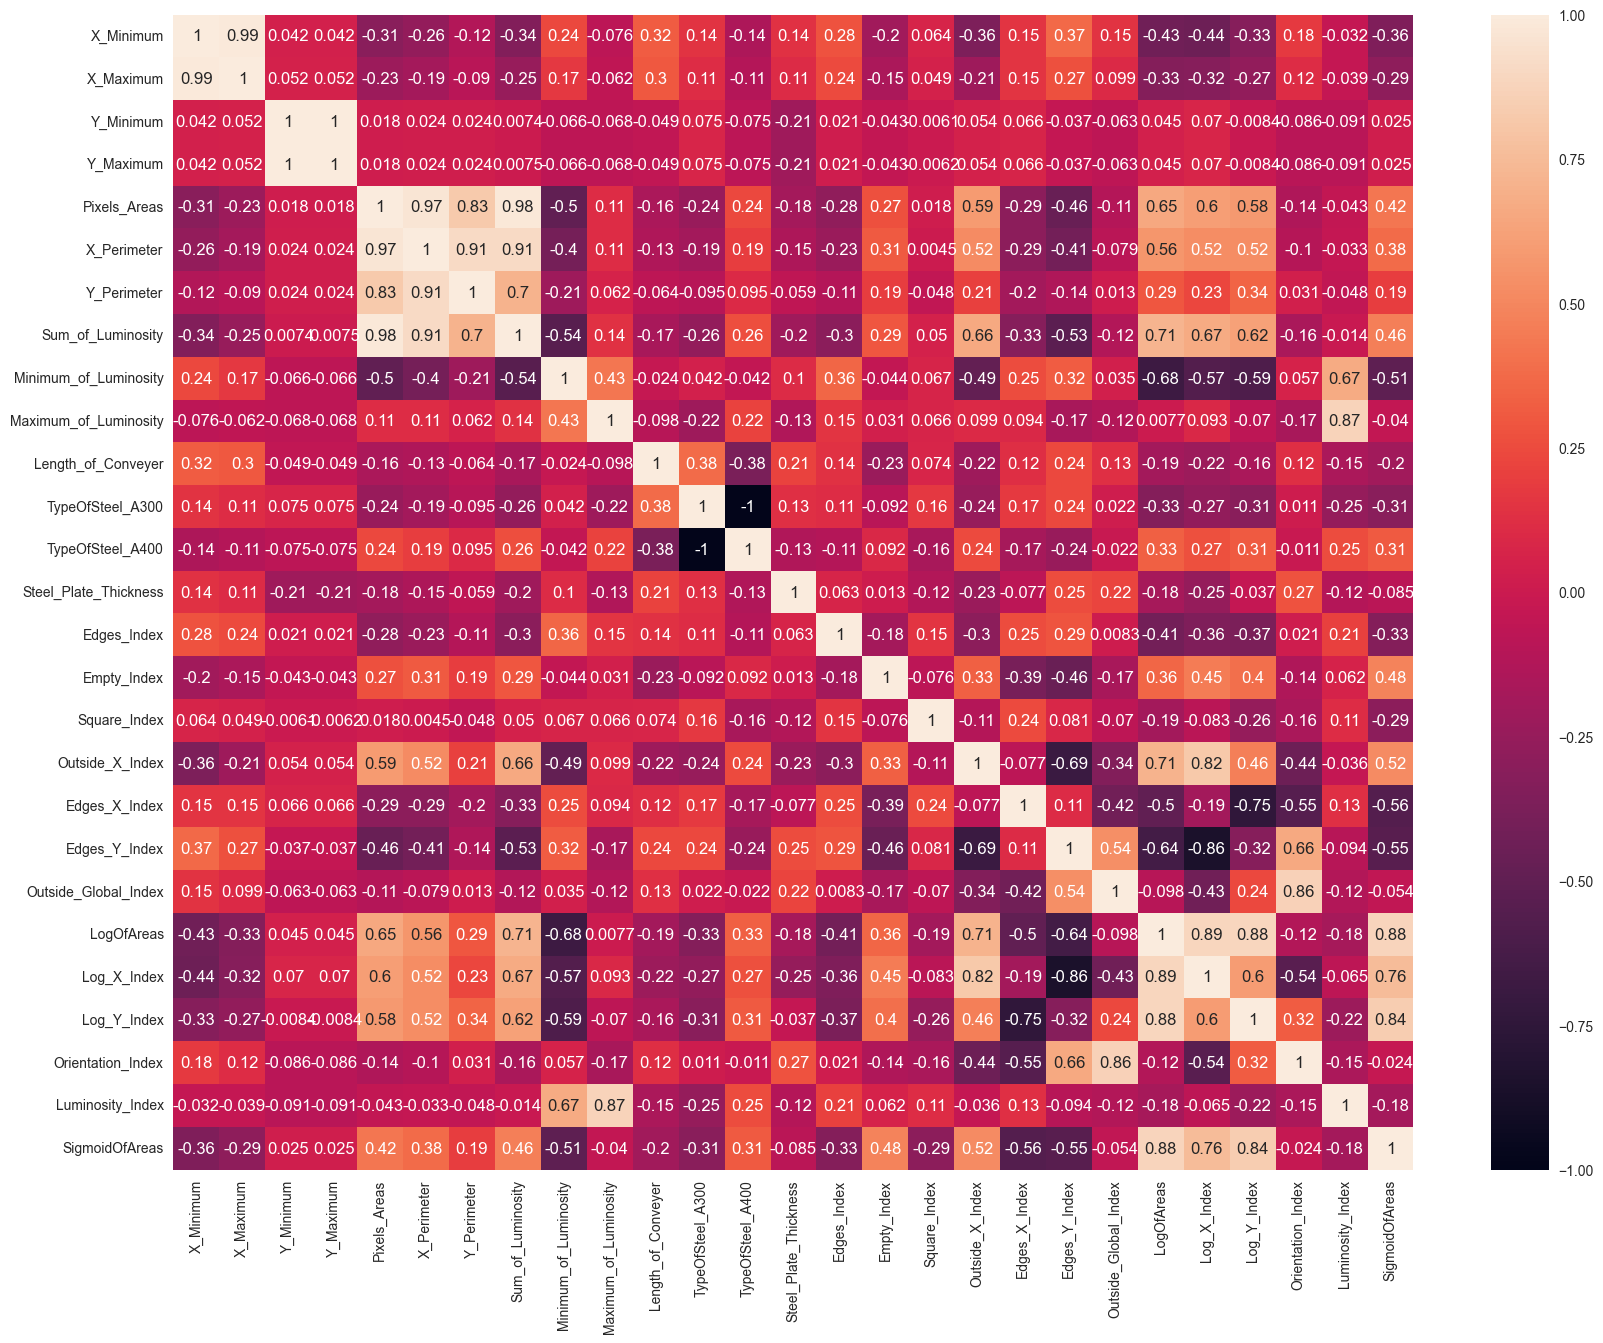

In [61]:
#df = pd.DataFrame(features)
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(tester.corr(), annot=True)

In [62]:
labels = [np.argmax(row) for row in labels]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,test_size=0.30,random_state=12)

scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

# Random Forest Classifier

In [63]:
rf_clf = RandomForestClassifier(random_state=17, min_samples_split=2, n_estimators=73, max_features=0.3)
rf_clf.fit(features_train,labels_train)
rf_pred = rf_clf.predict(features_test)

In [64]:
print("Accuracy :",accuracy_score(rf_pred, labels_test))
print("Classification Report :",classification_report(rf_pred, labels_test))

Accuracy : 0.7855917667238422
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.60      0.61        42
           1       0.84      0.95      0.89        57
           2       0.94      0.99      0.96       109
           3       1.00      0.92      0.96        24
           4       0.65      0.79      0.71        14
           5       0.66      0.70      0.68       109
           6       0.77      0.71      0.74       228

    accuracy                           0.79       583
   macro avg       0.78      0.81      0.79       583
weighted avg       0.79      0.79      0.78       583



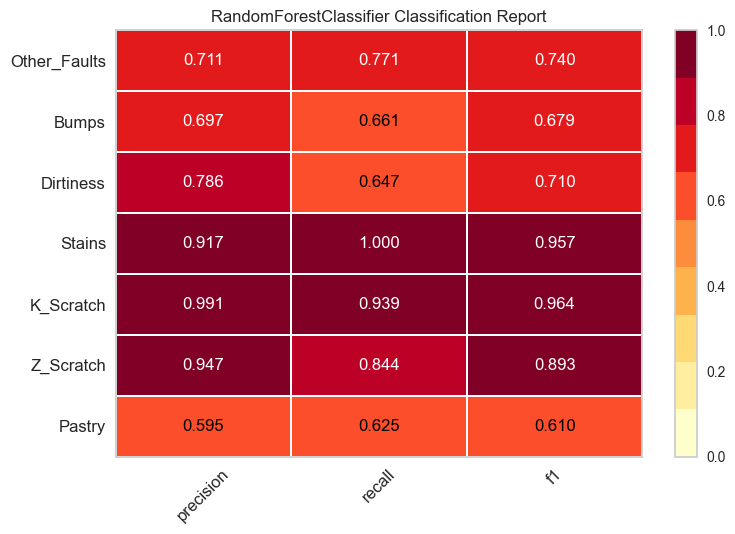

In [65]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rf_clf, classes=['Pastry','Z_Scratch','K_Scratch','Stains','Dirtiness','Bumps','Other_Faults'])

visualizer.fit(features_train, labels_train)  # Fit the training data to the visualizer
visualizer.score(features_test, labels_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [66]:
!pip install yellowbrick

# Visualize Feature Importance

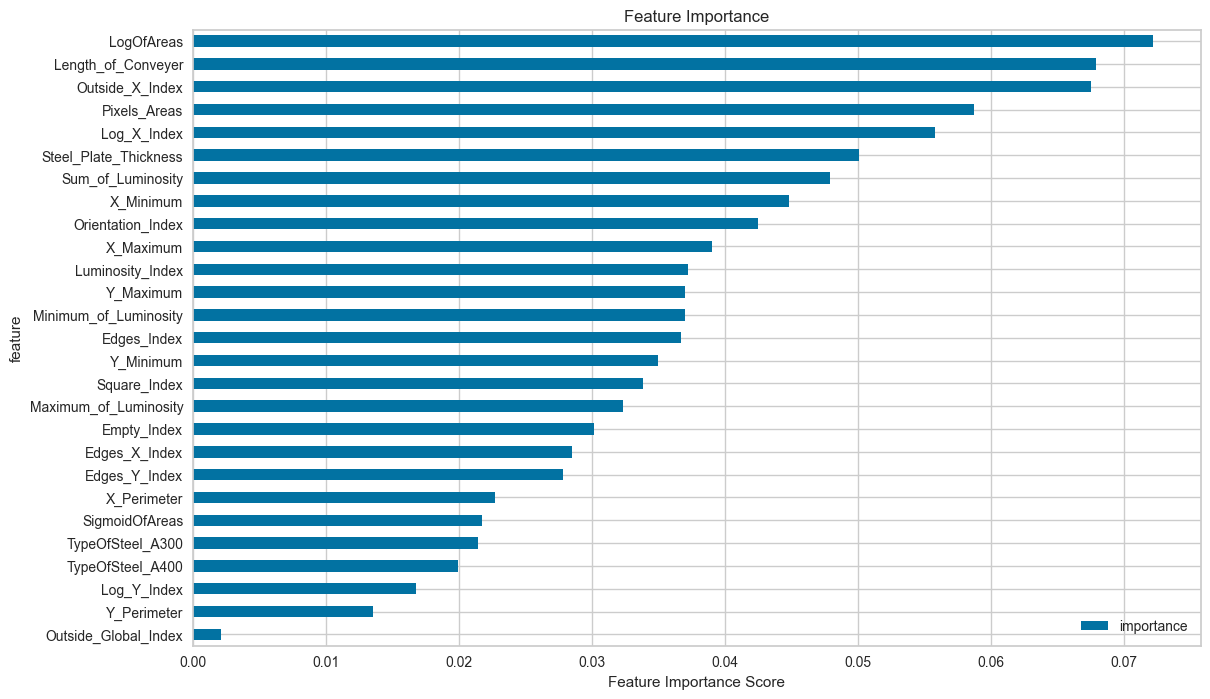

In [67]:
cols = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas']

feat_imp = pd.DataFrame({'importance':rf_clf.feature_importances_})    
feat_imp['feature'] = cols
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:27]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Feature Importance', figsize=[13,8])
plt.xlabel('Feature Importance Score')
plt.show()

#Droping Features and Re-Running

In [68]:
data.drop('Outside_Global_Index', axis = 1)
data.drop('TypeOfSteel_A300', axis = 1)
data.drop('TypeOfSteel_A400', axis = 1)
data.drop('Log_Y_Index', axis = 1)
features2 = data.values
labels2 = features2[:,27:34]
features2 = features2[:,0:27]

In [69]:
labels2 = [np.argmax(row) for row in labels2]
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(features2, labels2,test_size=0.30, random_state=42)

In [70]:
rf_clf = RandomForestClassifier(random_state=17, min_samples_split=2, n_estimators=63, max_features=0.29,n_jobs=-1)
rf_clf.fit(features_train2,labels_train2)
rf_pred = rf_clf.predict(features_test2)

print("Accuracy :",accuracy_score(rf_pred, labels_test2))

Accuracy : 0.8078902229845626


#Cross-Validation

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf,features_train2,labels_train2, cv=40,n_jobs=-1)
scores[26]
#print("Maximum Accuracy acheived: %0.4f" % (scores.max()))

0.8235294117647058